In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
df = pd.read_csv("C:/Users/Murthy/Desktop/Jaideep Folder/Internship/ApnaGuide/ML_Weather/weatherAUS.csv")


In [9]:
print("Initial Data:")
display(df.head())

Initial Data:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [11]:
print("Missing Values:")
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

Missing Values:


MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
dtype: int64

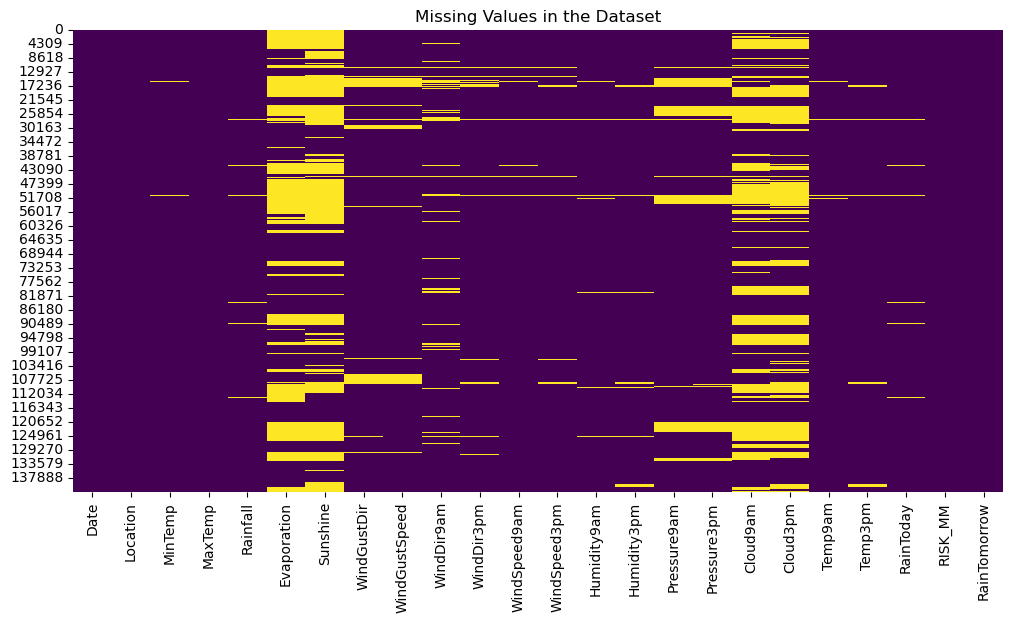

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

In [17]:
label_encoders = {}
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [19]:
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [21]:
print("Data after Encoding Categorical Variables:")
display(df.head())

Data after Encoding Categorical Variables:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01-12-2008,2,13.4,22.9,0.6,12.0,12.3,13,44.0,13,...,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,0,0.0,0
1,02-12-2008,2,7.4,25.1,0.0,12.0,12.3,14,44.0,6,...,25.0,1010.6,1007.8,8.0,2.0,17.2,24.3,0,0.0,0
2,03-12-2008,2,12.9,25.7,0.0,12.0,12.3,15,46.0,13,...,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0.0,0
3,04-12-2008,2,9.2,28.0,0.0,12.0,12.3,4,24.0,9,...,16.0,1017.6,1012.8,8.0,2.0,18.1,26.5,0,1.0,0
4,05-12-2008,2,17.5,32.3,1.0,12.0,12.3,13,41.0,1,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.2,0


In [23]:
X = df.drop(['Date', 'RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled Feature Data (first 5 rows):")
display(pd.DataFrame(X_scaled, columns=X.columns).head())

Scaled Feature Data (first 5 rows):


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,-1.527004,0.189095,-0.046015,-0.207391,0.720211,1.382688,1.071008,0.337766,1.256278,1.349565,...,0.110569,-1.404026,-1.460779,-1.225051,1.128246,-0.942042,-0.009803,0.014823,-0.53717,-0.278450
1,-1.527004,-0.747815,0.263060,-0.278254,0.720211,1.382688,1.284363,0.337766,-0.292367,1.567369,...,-1.292289,-1.260567,-1.044942,-1.123261,1.128246,-0.942042,0.036272,0.373995,-0.53717,-0.278450
2,-1.527004,0.111019,0.347353,-0.278254,0.720211,1.382688,1.497719,0.484786,1.256278,1.567369,...,-1.604035,-1.021471,-1.475118,-0.992388,1.128246,-0.942042,0.619883,0.215959,-0.53717,-0.278450
3,-1.527004,-0.466742,0.670477,-0.278254,0.720211,1.382688,-0.849192,-1.132427,0.371338,-1.699692,...,-1.240331,-1.690942,-0.041197,-0.396188,1.128246,-0.942042,0.174496,0.690066,-0.53717,-0.160497
4,-1.527004,0.829317,1.274577,-0.160149,0.720211,1.382688,1.071008,0.117237,-1.398542,-0.175064,...,0.682104,-0.878012,-1.016263,-1.385007,0.779207,1.214975,0.128421,1.149806,-0.53717,-0.254859


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [31]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = model.predict(X_test)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22098
           1       1.00      1.00      1.00      6341

    accuracy                           1.00     28439
   macro avg       1.00      1.00      1.00     28439
weighted avg       1.00      1.00      1.00     28439

Confusion Matrix:


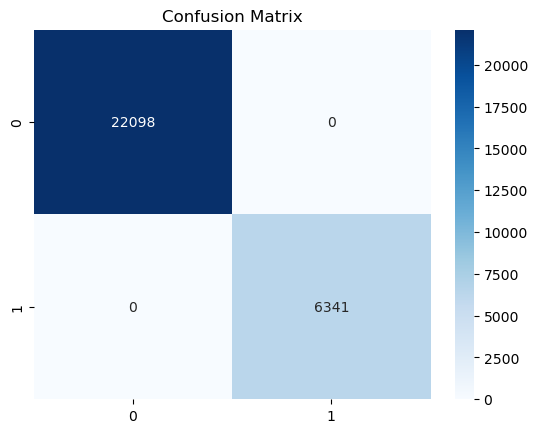

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [37]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

In [39]:
print("Feature Ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]:.2f})")

Feature Ranking:
1. feature 21 (0.79)
2. feature 13 (0.08)
3. feature 3 (0.02)
4. feature 20 (0.02)
5. feature 5 (0.01)
6. feature 7 (0.01)
7. feature 15 (0.01)
8. feature 12 (0.01)
9. feature 14 (0.01)
10. feature 17 (0.01)
11. feature 19 (0.01)
12. feature 2 (0.00)
13. feature 1 (0.00)
14. feature 18 (0.00)
15. feature 11 (0.00)
16. feature 16 (0.00)
17. feature 4 (0.00)
18. feature 9 (0.00)
19. feature 10 (0.00)
20. feature 0 (0.00)
21. feature 8 (0.00)
22. feature 6 (0.00)


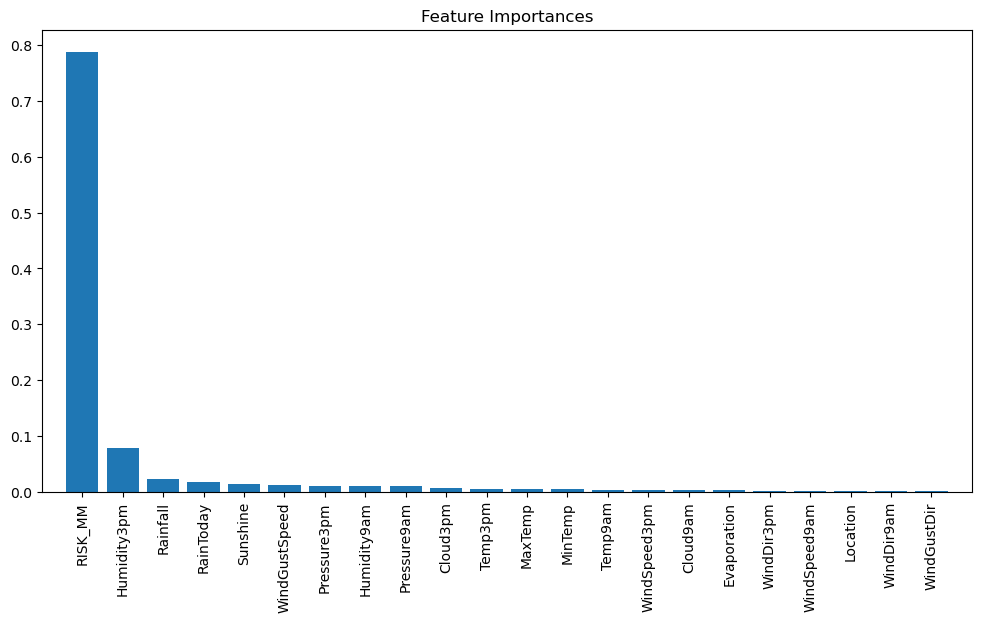

In [41]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()